In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import pandas as pd
import colorsys

In [2]:
# load CSV's
csv_train_file = pd.read_csv('/home/malmason/datasets/siim-isic-melanoma-classification/train.csv')
csv_test_file = pd.read_csv('/home/malmason/datasets/siim-isic-melanoma-classification/test.csv')

In [3]:
# Point to image folders
img_train_folder = '/home/malmason/datasets/siim-isic-melanoma-classification/jpeg/train/'
img_test_folder = '/home/malmason/datasets/siim-isic-melanoma-classification/jpeg/test/'

In [4]:
# Used for looping through image columns
X_train_img = csv_train_file['image_name']
X_test_img = csv_test_file['image_name']

In [5]:
# Min file size is 480, 640, 3 in CV2, or 640, 480, 3 in normal format
# Placeholder to:
# 1 - isolate lesion
# 2 - rescale inages to 640, 480, 3
# Change format to HSV F 

for image_train_get in X_train_img:
    pass
for image_test_get in X_test_img:
    pass

In [8]:
csv_train_file.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0


In [ ]:
print(a[2])

In [9]:
csv_train_file.tail(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0
33125,ISIC_9999806,IP_0046310,male,45.0,torso,nevus,benign,0


In [13]:
# Count normal and melanoma targets
csv_train_file['target'].value_counts()

0    32542
1      584
Name: target, dtype: int64

In [17]:
# list values where target is melonoma
csv_train_file[csv_train_file['target'] == 1]

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


In [18]:
# Load a couple of images
image = cv2.imread('/home/malmason/datasets/siim-isic-melanoma-classification/jpeg/train/ISIC_0015719.jpg')
image_m = cv2.imread('/home/malmason/datasets/siim-isic-melanoma-classification/jpeg/train/ISIC_0149568.jpg')

In [19]:
# transpose non-melanoma and melanoma images to rgb, hsvf and gray to examine
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_hsvf = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2HSV_FULL)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_rgb_m = cv2.cvtColor(image_m, cv2.COLOR_BGR2RGB)
image_hsvf_m = cv2.cvtColor(image_rgb_m,cv2.COLOR_RGB2HSV_FULL)
image_gray_m = cv2.cvtColor(image_m, cv2.COLOR_BGR2GRAY)

In [21]:
# Get shape of image loaded (all images range from CV2 shape 4000, 6000, 3 down to 480, 640, 3)
print(f'image_rgb shape {image_rgb.shape}, image_rgb_m shape {image_rgb_m.shape}')

image_rgb shape (4000, 6000, 3), image_rgb_m shape (4000, 6000, 3)


Normal rgb


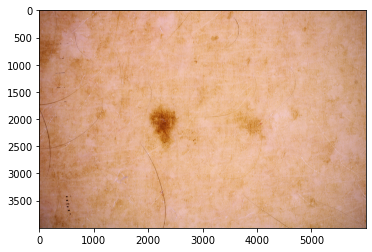

Melonoma rgb


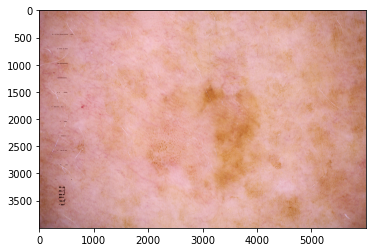

In [22]:
# Plot non-melanoma and melanoma images using rgb format
print("Normal rgb")
plt.imshow(image_rgb)
plt.show()
print("Melonoma rgb")
plt.imshow(image_rgb_m)
plt.show()
# Images will need manipulating

Normal hsvf


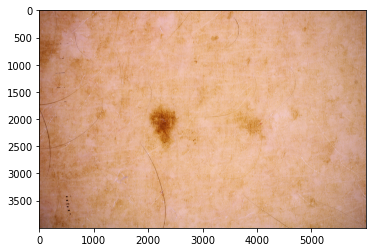

Menonoma hsvf


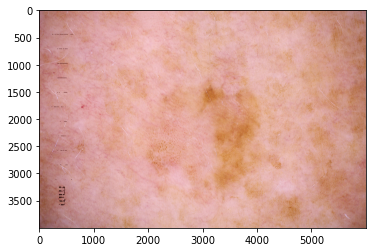

In [23]:
# Plot non-melanoma and melanoma images using hsvf format
print("Normal hsvf")
plt.imshow(hsv_to_rgb(image_hsvf/255))
plt.show()
print("Menonoma hsvf")
plt.imshow(hsv_to_rgb(image_hsvf_m/255))
plt.show()
# Images will need manipulating

Normal gray


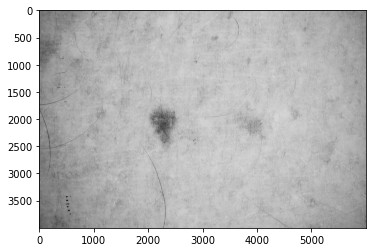

Melonoma gray


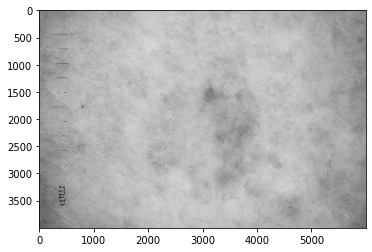

In [24]:
# Plot non-melanoma and melanoma images using grayscale format
print("Normal gray")
plt.imshow(image_gray, cmap='gray')
plt.show()
print("Melonoma gray")
plt.imshow(image_gray_m, cmap='gray')
plt.show()
# Images will need manipulating

In [25]:
# Show min and max for rgb channels
print (f'rgb: R_max: {np.max(image_rgb[:,:,0])} R_min: {np.min(image_rgb[:,:,0])}',
      f'\nrgb: G_max: {np.max(image_rgb[:,:,1])} G_min: {np.min(image_rgb[:,:,1])}'
      f'\nrgb: B_max: {np.max(image_rgb[:,:,2])} B_min: {np.min(image_rgb[:,:,2])}')

print (f'rgb_m: R_max: {np.max(image_rgb_m[:,:,0])} R_min: {np.min(image_rgb_m[:,:,0])}',
      f'\nrgb_m: G_max: {np.max(image_rgb_m[:,:,1])} G_min: {np.min(image_rgb_m[:,:,1])}'
      f'\nrgb_m: B_max: {np.max(image_rgb_m[:,:,2])} B_min: {np.min(image_rgb_m[:,:,2])}')
# Not going to get the resolution in rgb format

rgb: R_max: 255 R_min: 17 
rgb: G_max: 250 G_min: 0
rgb: B_max: 255 B_min: 0
rgb_m: R_max: 255 R_min: 19 
rgb_m: G_max: 247 G_min: 0
rgb_m: B_max: 255 B_min: 0


In [27]:
# Show min and max for hsvf channels
print (f'hsvf: H_max: {np.max(image_hsvf[:,:,0])} H_min: {np.min(image_hsvf[:,:,0])}',
      f'\nhsvf: S_max: {np.max(image_hsvf[:,:,1])} S_min: {np.min(image_hsvf[:,:,1])}'
      f'\nhsvf: V_max: {np.max(image_hsvf[:,:,2])} V_min: {np.min(image_hsvf[:,:,2])}')

print (f'hsvf_m: H_max: {np.max(image_hsvf_m[:,:,0])} H_min: {np.min(image_hsvf_m[:,:,0])}',
      f'\nhsvf_m: S_max: {np.max(image_hsvf_m[:,:,1])} S_min: {np.min(image_hsvf_m[:,:,1])}'
      f'\nhsvf_m: V_max: {np.max(image_hsvf_m[:,:,2])} V_min: {np.min(image_hsvf_m[:,:,2])}')
# Going to need to work out how to adjust this, as not much scope to change either

hsvf: H_max: 255 H_min: 0 
hsvf: S_max: 255 S_min: 7
hsvf: V_max: 255 V_min: 17
hsvf_m: H_max: 255 H_min: 0 
hsvf_m: S_max: 255 S_min: 9
hsvf_m: V_max: 255 V_min: 19


In [28]:
# Attempt to normalize hsvf images
H, S, V = cv2.split(image_hsvf)

s_min = np.min(S)
s_max = np.max(S)
s_range = np.max(S) - np.min(S)
S = np.subtract(S, s_min)
S = np.divide(S, s_range)
S = np.multiply(S, 255)

v_min = np.min(V)
v_max = np.max(V)
v_range = np.max(V) - np.min(V)
V = np.subtract(V, v_min)
V = np.divide(V, v_range)
V = np.multiply(V, 255)

image_hsvf_norm = np.zeros((4000,6000, 3), dtype=np.uint8)
image_hsvf_norm[:,:,0] = H
image_hsvf_norm[:,:,1] = S
image_hsvf_norm[:,:,2] = V
print (f'H_min: {np.min(image_hsvf_norm[:,:,0])} \tH_max: {np.max(image_hsvf_norm[:,:,0])}',
      f'\nS_min: {np.min(image_hsvf_norm[:,:,1])} \tS_max: {np.max(image_hsvf_norm[:,:,1])}'
      f'\nV_min: {np.min(image_hsvf_norm[:,:,2])} \tV_max: {np.max(image_hsvf_norm[:,:,2])}\n')

H_m, S_m, V_m = cv2.split(image_hsvf_m)

s_m_min = np.min(S_m)
s_m_max = np.max(S_m)
s_m_range = np.max(S_m) - np.min(S_m)
S_m = np.subtract(S_m, s_m_min)
S_m = np.divide(S_m, s_m_range)
S_m = np.multiply(S_m, 255)

v_m_min = np.min(V_m)
v_m_max = np.max(V_m)
v_m_range = np.max(V_m) - np.min(V_m)
V_m = np.subtract(V_m, v_m_min)
V_m = np.divide(V_m, v_m_range)
V_m = np.multiply(V_m, 255)

image_hsvf_norm_m = np.zeros((4000,6000, 3), dtype=np.uint8)
image_hsvf_norm_m[:,:,0] = H_m
image_hsvf_norm_m[:,:,1] = S_m
image_hsvf_norm_m[:,:,2] = V_m
print (f'H_m_min: {np.min(image_hsvf_norm_m[:,:,0])} \tH_m_max: {np.max(image_hsvf_norm_m[:,:,0])}',
      f'\nS_m_min: {np.min(image_hsvf_norm_m[:,:,1])} \tS_m_max: {np.max(image_hsvf_norm_m[:,:,1])}'
      f'\nV_m_min: {np.min(image_hsvf_norm_m[:,:,2])} \tV_m_max: {np.max(image_hsvf_norm_m[:,:,2])}\n')

H_min: 0 	H_max: 255 
S_min: 0 	S_max: 255
V_min: 0 	V_max: 255

H_m_min: 0 	H_m_max: 255 
S_m_min: 0 	S_m_max: 255
V_m_min: 0 	V_m_max: 255



Standard hsvf


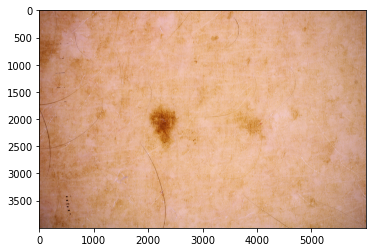

Normalized hsvf


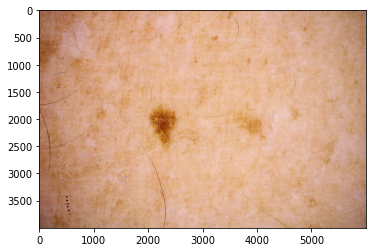

Standard Melanoma hsvf


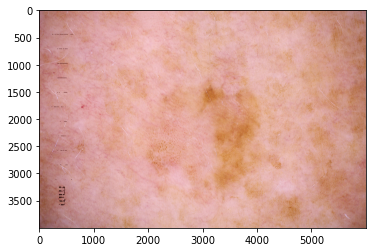

Normalized Melonoma hsvf


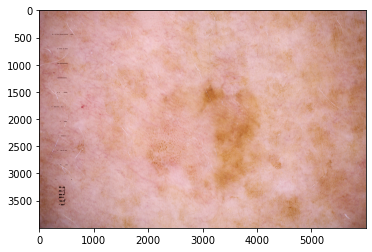

In [30]:
# Compare standard hsvf versus normalized
print("Standard hsvf")
plt.imshow(hsv_to_rgb(image_hsvf/255))
plt.show()
print("Normalized hsvf")
plt.imshow(hsv_to_rgb(image_hsvf_norm/255))
plt.show()
print("Standard Melanoma hsvf")
plt.imshow(hsv_to_rgb(image_hsvf_m/255))
plt.show()
print("Normalized Melonoma hsvf")
plt.imshow(hsv_to_rgb(image_hsvf_norm_m/255))
plt.show()
# Not enough resolution to help

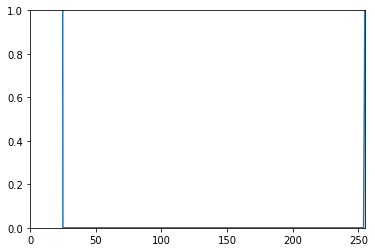

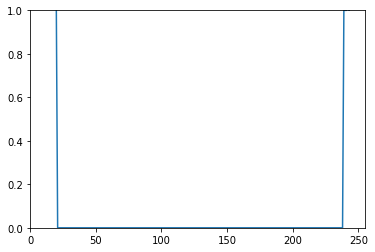

In [32]:
# Plot histograms for HUE
h_hist = cv2.calcHist(H, [0], None, [256],[0,256])
plt.xlim(0, 255)
plt.ylim(0, 1)
plt.plot(h_hist)
plt.show()

h_hist_m = cv2.calcHist(H_m, [0], None, [256],[0,256])
plt.xlim(0, 255)
plt.ylim(0, 1)
plt.plot(h_hist_m)
plt.show()
# Results are loads of dead space

In [33]:
# Quick check on unique elements as above
unique_elements_H, counts_elements_H = np.unique(H, return_counts=True)
unique_elements_S, counts_elements_S = np.unique(S, return_counts=True)
unique_elements_V, counts_elements_V = np.unique(V, return_counts=True)

unique_elements_H_m, counts_elements_H_m = np.unique(H_m, return_counts=True)
unique_elements_S_m, counts_elements_S_m = np.unique(S_m, return_counts=True)
unique_elements_V_m, counts_elements_V_m = np.unique(V_m, return_counts=True)

In [34]:
print(np.asarray((unique_elements_H, counts_elements_H)))

[[      0       1       2       3       4       5       6       7       8
        9      10      11      12      13      14      15      16      17
       18      19      20      21      22      23      24      25      26
       27      28      29      30      32     202     206     208     209
      210     211     212     213     215     216     217     218     219
      220     221     222     223     224     225     226     227     228
      229     230     231     232     233     234     235     236     237
      238     239     240     241     242     243     244     245     246
      247     248     249     250     251     252     253     254     255]
 [   2712    4296    8760   16114   17875   39122   28453  106549   49231
   216193  249415  466871  708206 1437084 1728621 2843106 2971705 3513110
  3872818 2536051 1695981  774090  495201  164477   33720    5209     326
        8       9       1       2       2       1       5       7       2
        3       3      12      44    

In [35]:
print(np.asarray((unique_elements_H_m, counts_elements_H_m)))

[[      0       1       2       3       4       5       6       7       8
        9      10      11      12      13      14      15      16      17
       18      19      20      21      22      23      24      28     201
      202     204     206     207     208     209     210     211     212
      213     214     215     216     217     218     219     220     221
      222     223     224     225     226     227     228     229     230
      231     232     233     234     235     236     237     238     239
      240     241     242     243     244     245     246     247     248
      249     250     251     252     253     254     255]
 [ 571325 1378317 1042363 1445039  995632 1531281  981656 1966889 1330494
  1701697 1297432 1422857 1202764  892856  757274  636734  473308  355247
   324288  199641   83101   17101    1217      87       1       1       1
        2       6      23       6      23      16      13      12      59
      125       2      32      83      43      59    

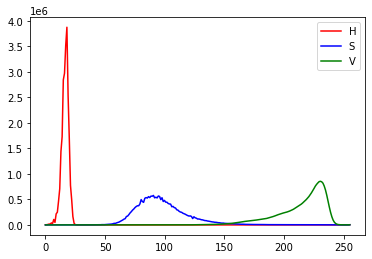

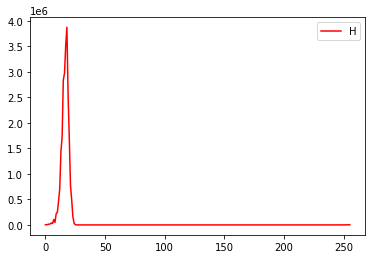

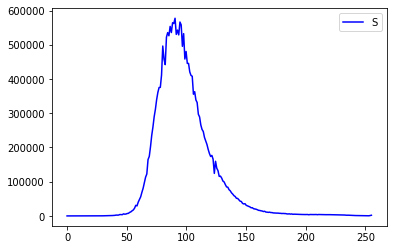

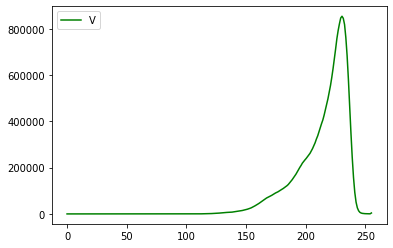

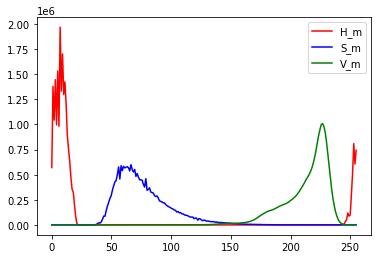

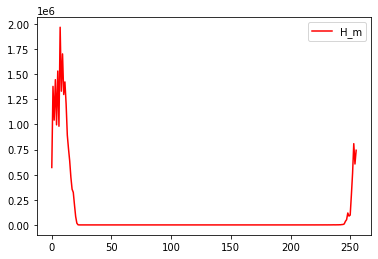

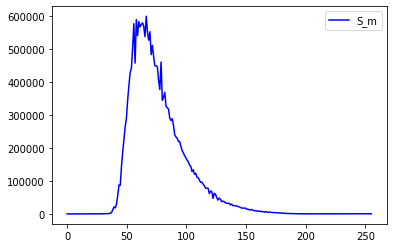

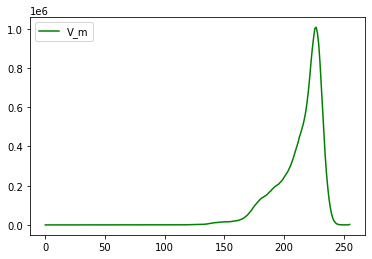

In [37]:
# Take a look at hsvf images which are in normal state
plt.plot(unique_elements_H, counts_elements_H, color='r', label = 'H')
plt.plot(unique_elements_S, counts_elements_S, color='b', label = 'S')
plt.plot(unique_elements_V, counts_elements_V, color='g', label = 'V')
plt.legend()
plt.show()
plt.plot(unique_elements_H, counts_elements_H, color='r', label = 'H')
plt.legend()
plt.show()
plt.plot(unique_elements_S, counts_elements_S, color='b', label = 'S')
plt.legend()
plt.show()
plt.plot(unique_elements_V, counts_elements_V, color='g', label = 'V')
plt.legend()
plt.show()

plt.plot(unique_elements_H_m, counts_elements_H_m, color='r', label = 'H_m')
plt.plot(unique_elements_S_m, counts_elements_S_m, color='b', label = 'S_m')
plt.plot(unique_elements_V_m, counts_elements_V_m, color='g', label = 'V_m')
plt.legend()
plt.show()
plt.plot(unique_elements_H_m, counts_elements_H_m, color='r', label = 'H_m')
plt.legend()
plt.show()
plt.plot(unique_elements_S_m, counts_elements_S_m, color='b', label = 'S_m')
plt.legend()
plt.show()
plt.plot(unique_elements_V_m, counts_elements_V_m, color='g', label = 'V_m')
plt.legend()
plt.show()

(3, 255, 3)


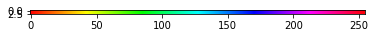

In [38]:
# Useless check against hsvf HUE range, to ensure it captures full 360 deg
H_demo = np.arange(0,255,1)
S_demo = np.ones(255) * 255
V_demo = np.ones(255) * 255

demo = np.zeros((3,255,3), dtype=np.uint8)

demo[0,:,0] = H_demo
demo[1,:,0] = H_demo
demo[2,:,0] = H_demo
demo[0,:,1] = S_demo
demo[1,:,1] = S_demo
demo[2,:,1] = S_demo
demo[0,:,2] = V_demo
demo[1,:,2] = V_demo
demo[2,:,2] = V_demo

print(demo.shape)

demo = np.divide(demo, 255) 
plt.imshow(hsv_to_rgb(demo))

In [39]:
# Check if we can get more resolution by introducing non-linear saturation and value using  **2
H_p, S_p, V_p = cv2.split(image_hsvf)
H_p = np.float32(H_p)

sp_min = np.min(S_p)
sp_max = np.max(S_p)
sp_range = np.max(S_p) - np.min(S_p)
S_p = np.subtract(S_p, sp_min)
S_p = np.divide(S_p, sp_range)
S_p = np.multiply(S_p, 15.9)
S_p = np.power(S_p, 2)


vp_min = np.min(V_p)
vp_max = np.max(V_p)
vp_range = np.max(V_p) - np.min(V_p)
V_p = np.subtract(V_p, vp_min)
V_p = np.divide(V_p, vp_range)
V_p = np.multiply(V_p, 15.9)
V_p = np.power(V_p,2)

print(np.min(H_p), np.max(H_p))
print(np.min(S_p), np.max(S_p))
print(np.min(V_p), np.max(V_p))

image_hsvf_norm_p = np.zeros((4000,6000, 3), dtype=np.float32)

H_l_p = H_p / 255
S_l_p = S_p / np.max(S_p)
V_l_p = V_p / np.max(V_p)

image_hsvf_norm_p[:,:,0] = H_l_p
image_hsvf_norm_p[:,:,1] = S_l_p
image_hsvf_norm_p[:,:,2] = V_l_p

print (f'H_min: {np.min(H_l_p)} \tH_max: {np.max(H_l_p)}',
      f'\nS_min: {np.min(S_l_p)} \tS_max: {np.max(S_l_p)}'
      f'\nV_min: {np.min(V_l_p)} \tV_max: {np.max(V_l_p)}\n')

0.0 255.0
0.0 252.81
0.0 252.81
H_min: 0.0 	H_max: 1.0 
S_min: 0.0 	S_max: 1.0
V_min: 0.0 	V_max: 1.0



In [40]:
image_hsvf_norm_p_f = np.float32(image_hsvf_norm_p)
print(f'Type: {image_hsvf_norm_p_f.dtype}')

Type: float32


	HSVF with S and V ^ 2


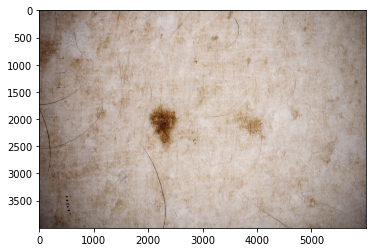


	Grayscale


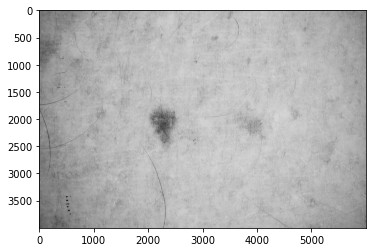

In [42]:
# Quick plot to check if we get better resolution with **2
print("\tHSVF with S and V ^ 2")
plt.imshow(hsv_to_rgb(image_hsvf_norm_p_f), label="S and V ^ 2")
plt.show()
print("\n\tGrayscale")
plt.imshow(image_gray, cmap='gray', label = "Standard grayscale")
plt.show()
# Result is yes we do get a higher resolution

In [43]:
# Same as above but for the melanoma image
H_p_m, S_p_m, V_p_m = cv2.split(image_hsvf_m)
H_p_m = np.float32(H_p_m)

sp_min_m = np.min(S_p_m)
sp_max_m = np.max(S_p_m)
sp_range_m = np.max(S_p_m) - np.min(S_p_m)
S_p_m = np.subtract(S_p_m, sp_min_m)
S_p_m = np.divide(S_p_m, sp_range_m)
S_p_m = np.multiply(S_p_m, 15.9)
S_p_m = np.power(S_p_m, 2)


vp_min_m = np.min(V_p_m)
vp_max_m = np.max(V_p_m)
vp_range_m = np.max(V_p_m) - np.min(V_p_m)
V_p_m = np.subtract(V_p_m, vp_min_m)
V_p_m = np.divide(V_p_m, vp_range_m)
V_p_m = np.multiply(V_p_m, 15.9)
V_p_m = np.power(V_p_m,2)

print(np.min(H_p_m), np.max(H_p_m))
print(np.min(S_p_m), np.max(S_p_m))
print(np.min(V_p_m), np.max(V_p_m))

image_hsvf_norm_p_m = np.zeros((4000,6000, 3), dtype=np.float32)

H_l_p_m = H_p_m / 255
S_l_p_m = S_p_m / np.max(S_p_m)
V_l_p_m = V_p_m / np.max(V_p_m)

image_hsvf_norm_p_m[:,:,0] = H_l_p_m
image_hsvf_norm_p_m[:,:,1] = S_l_p_m
image_hsvf_norm_p_m[:,:,2] = V_l_p_m

print (f'H_min_m: {np.min(H_l_p_m)} \tH_max_m: {np.max(H_l_p_m)}',
      f'\nS_min_m: {np.min(S_l_p_m)} \tS_max_m: {np.max(S_l_p_m)}'
      f'\nV_min_m: {np.min(V_l_p_m)} \tV_max_m: {np.max(V_l_p_m)}\n')

0.0 255.0
0.0 252.81
0.0 252.81
H_min_m: 0.0 	H_max_m: 1.0 
S_min_m: 0.0 	S_max_m: 1.0
V_min_m: 0.0 	V_max_m: 1.0



In [44]:
image_hsvf_norm_p_f_m = np.float32(image_hsvf_norm_p_m)
print(f'Type: {image_hsvf_norm_p_f_m.dtype}')

Type: float32


	HSVF_m with S and V ^ 2


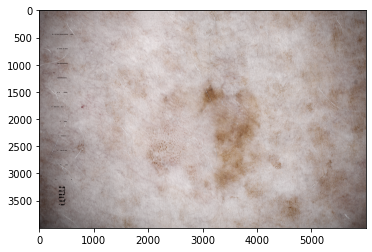


	Grayscale


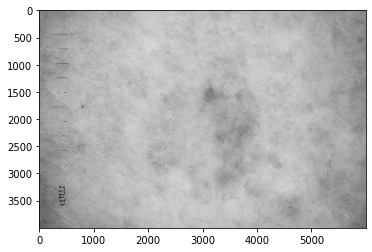

In [46]:
# Plot to check if we get a better resolution with **2 on melanoma image
print("\tHSVF_m with S and V ^ 2")
plt.imshow(hsv_to_rgb(image_hsvf_norm_p_f_m), label="S and V ^ 2")
plt.show()
print("\n\tGrayscale")
plt.imshow(image_gray_m, cmap='gray', label = "Standard grayscale")
plt.show()
# Looks better, but now way to improve using power method
# Danger of false readings with S and V mean + std, so not trying now

In [48]:
# Proof that the mean for saturation is shocking. Ideally, we would want close to 0,5
print(f'Min:{np.min(image_hsvf_norm_p_f_m[:,:,1])}, Max: {np.max(image_hsvf_norm_p_f_m[:,:,1])}, Mean: {np.mean(image_hsvf_norm_p_f_m[:,:,1])}')

Min:0.0, Max: 1.0, Mean: 0.09753306955099106


In [49]:
unique_elements_H_p, counts_elements_H_p = np.unique(H_p, return_counts=True)
unique_elements_S_p, counts_elements_S_p = np.unique(S_p, return_counts=True)
unique_elements_V_p, counts_elements_V_p = np.unique(V_p, return_counts=True)

unique_elements_H_p_m, counts_elements_H_p_m = np.unique(H_p_m, return_counts=True)
unique_elements_S_p_m, counts_elements_S_p_m = np.unique(S_p_m, return_counts=True)
unique_elements_V_p_m, counts_elements_V_p_m = np.unique(V_p_m, return_counts=True)